# Abstract
Earthquakes are natural disasters that we are unable to avoid and it is bound to cause various economical damage to the country. Hence, by studying the dataset collected by Nepal's Central Bureau of Statistics after Nepal was struck with a devastating earthquake, we hope to identify characteristics/elements (materials and foundations, etc) of earthquake-resilient buildings which can be incorporated into future building constructions to prevent further incidents. Models will be created to predict the extent of damage building of certain characteristics is likely to suffer during an earthquake. Identify characteristics/elements (materials and foundations, etc) of earthquake-resilient buildings which can be incorporated into future building constructions to prevent further incidents.

# Problem Statement
What characteristics do earthquake-resistant buildings have?/ How to minimise damage during an earthquake?

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Explore the dataset

In [13]:
#Import the data from both files
eq_train = pd.read_csv('train_values.csv')
eq_damage_grade_train = pd.read_csv('train_labels.csv')

Description of the dataset
> **geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int)** : geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.  
**count_floors_pre_eq (type: int)** : number of floors in the building before the earthquake.   
**age (type: int)** : age of the building in years.  
**area_percentage (type: int)** : normalized area of the building footprint.  
**height_percentage (type: int)** : normalized height of the building footprint.  
**land_surface_condition (type: categorical)** : surface condition of the land where the building was built. Possible values: n, o, t.  
**foundation_type (type: categorical)** : type of foundation used while building. Possible values: h, i, r, u, w.  
**roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.  
ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.  
other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.  
position (type: categorical): position of the building. Possible values: j, o, s, t.  
plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.  
has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.  
has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.  
has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.  
has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.  
has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.  
has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.  
has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.  
has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.  
has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.  
has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.  
has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.  
legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.  
count_families (type: int): number of families that live in the building.  
has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.  
has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.  
has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.  
has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.  
has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.  
has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.  
has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.  
has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.  
has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.  
has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.  
has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.  

In [10]:
# Information about the Variables
eq_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [23]:
#Dataframe of integer variables
eq_train_int = pd.DataFrame(eq_train[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',\
                                      'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',\
                                      'count_families']])

#Dataframe of categorical variables (non-binary)
eq_train_cat = pd.DataFrame(eq_train[['land_surface_condition', 'foundation_type', 'roof_type',\
                                      'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration',\
                                      'legal_ownership_status']])

#Dataframe of categorical variables (binary)
eq_train_bin = pd.DataFrame(eq_train[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',\
                                      'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',\
                                      'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                                      'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                                      'has_superstructure_rc_engineered','has_superstructure_other']])

#Second dataframe of categorical variables (binary)
eq_train_bin2 = pd.DataFrame(eq_train[['has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental',\
                                       'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry',\
                                       'has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police',\
                                       'has_secondary_use_other']])

In [24]:
eq_train_int.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.983949
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.418389
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,1.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,1.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,1.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,9.000000


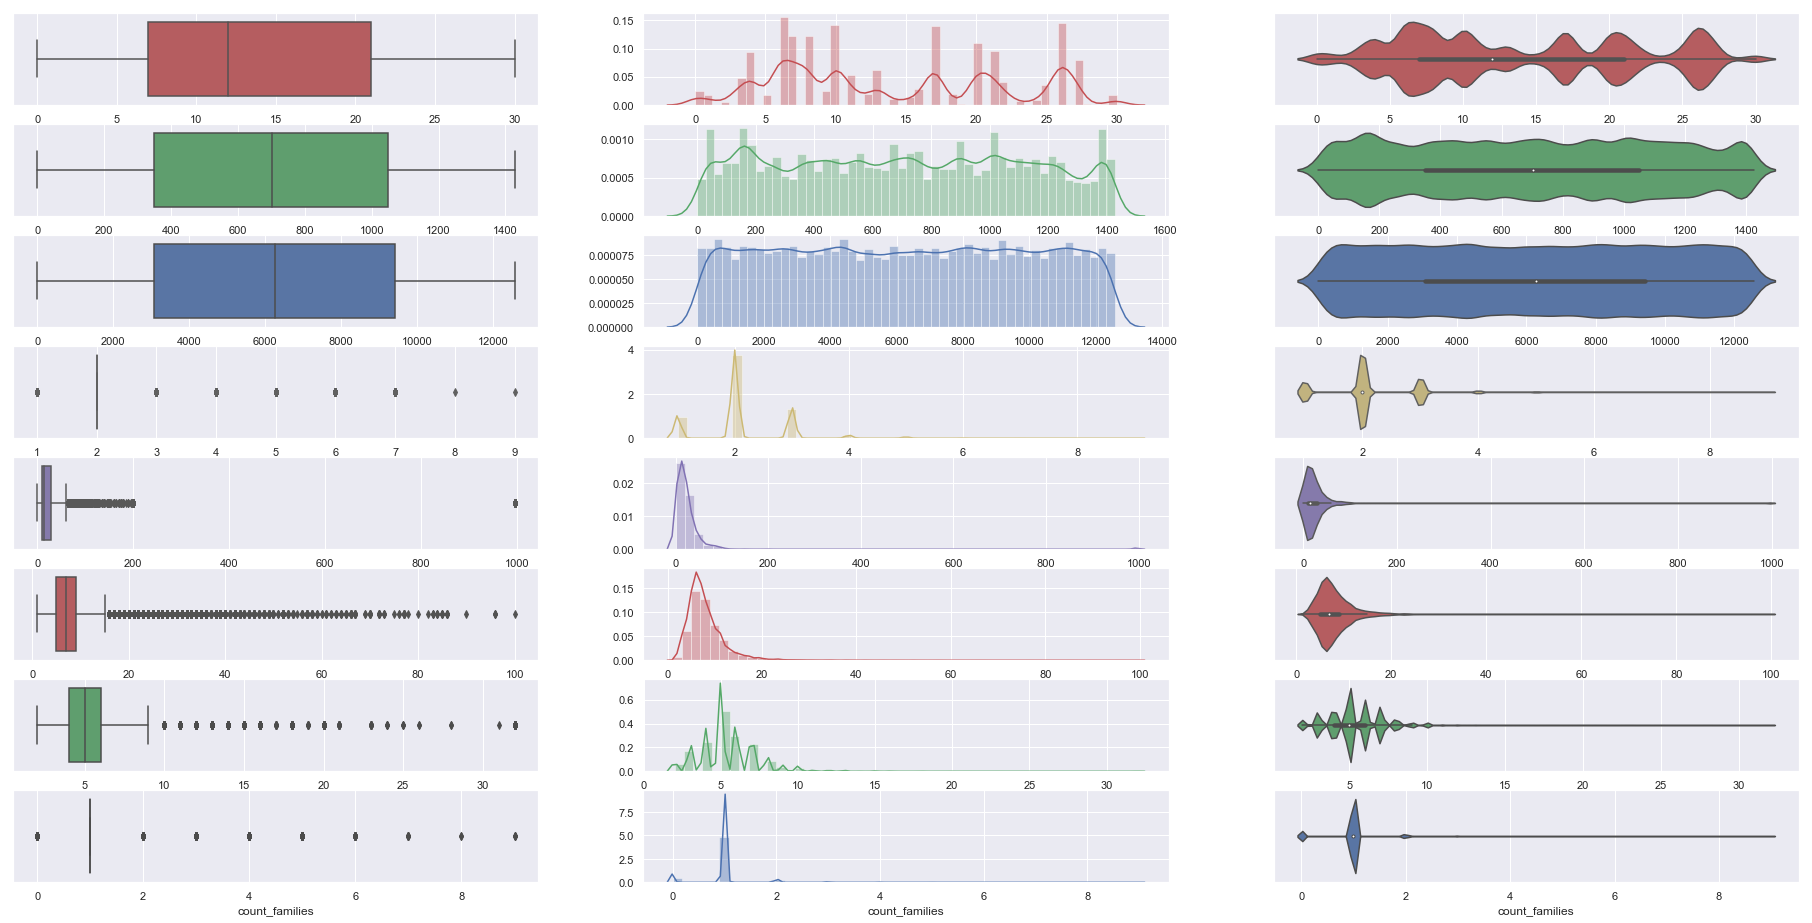

In [26]:
#Plot the distribution of each variable 
f,axes = plt.subplots(8,3,figsize=(32,16))
colours = ["r","g","b","y","m","r","g","b","y"]

count = 0
for var in eq_train_int :
    sb.boxplot(eq_train_int[var], orient = "h", color = colours[count], ax = axes[count,0])
    sb.distplot(eq_train_int[var], color = colours[count], ax = axes[count,1])
    sb.violinplot(eq_train_int[var], color = colours[count], ax = axes[count,2])
    count+=1